In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_train = np.linspace(0.,1.,10)
X_valid = np.linspace(0.,1.,100)
np.random.seed(1862)#400121862
t_valid = np.sin(4*np.pi*X_valid)+0.3*np.random.randn(100)
t_train = np.sin(4*np.pi*X_train)+0.3*np.random.randn(10)
print(X_train)
print(X_valid)
print(t_train)
print(t_valid)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.797

In [3]:
M = len(X_valid)
N = len(X_train)
X1_train=[np.ones(N)]
X1_valid = [np.ones(M)]

In [4]:
def find_everything(array,arrayv,num): # finds everything  and returns the arrray of [input training data for the value M specified,The validation array for the value M,w parameter vector for the specified value of M,y_train training predictor,y_valid validation predictor,train_error,valid_error,ftrue_error. inputs include the training array input as a dummy vector, same with the validation array and num represents M 
    valid_error = np.array([]) #to make an array of the valid errors for each value of M
    ftrue_error = np.array([])
    for i in range(num+1):
        if (i==0):
            array = np.transpose(array)
            arrayv = np.transpose(arrayv)
            w = np.matmul(np.linalg.inv((np.matmul(np.transpose(array),array))),(np.matmul(np.transpose(array),t_train)))
            y_train= (np.matmul(np.transpose(w),np.transpose(array)))
            train_error = (1/(i+1)) * np.matmul(np.transpose(y_train-t_train)**2,(y_train-t_train)**2)
            print(train_error)
            y_valid = np.matmul(w,np.transpose(arrayv))
            valid_error = np.insert(valid_error,0,(1/(i+1))*(np.matmul((y_valid-t_valid)**2,(y_valid-t_valid)**2)))  
            print(valid_error[i])
            X = np.concatenate((array,arrayv))#combines the dummy vectors
            X = np.sort(X)
            X1 = np.concatenate((X_train,X_valid))#combines the training and valid examples 
            X1 = np.sort(X1)#sorts the examples 
            fx = w*X   #the predictor fM(x)
            ftrue = np.sin((np.pi) * 4 * (X1))#the true function for t
            ftrue_valid = np.sin((np.pi)*4*X_valid)#the true function using only validation set examples for the error
            ftrue_error = np.insert(ftrue_error,0,(1/(i+1)) * np.matmul(np.transpose(ftrue_valid-t_valid)**2,(ftrue_valid-t_valid)**2))#squared error
            print(ftrue_error[i])
            plt.scatter(X_train, t_train)#plots the training examples
            plt.scatter(X_valid, t_valid)#plots the validation examples
            plt.plot(X1,ftrue,'-m',X1,fx,'-r')#plots the true f function and the fM(x) function
            plt.show()
        
        else:
            array = np.insert(array,i,[X_train**i],axis=1) #inserts the x training examples by column and puts it to the exponent of the current i, fM(x) = w0x^0 + w1x^1 + w2x^2...+w9x^9
            arrayv = np.insert(arrayv,i,[X_valid**i],axis=1)# does the same thing for the validation examples as above
            X = np.concatenate((array,arrayv))#concatenates the 2 arrays so the function plotted uses the x values from the training and validation set
            X = X[X[:,1].argsort()]#organizes the training and validation examples from lowest to greatest
            ftrue = np.sin((np.pi * 4 *(X1)))
            if (i==9):#when i==9 the regularizer must be used
                
                w = np.matmul(np.linalg.inv((np.matmul(np.transpose(array),array))),(np.matmul(np.transpose(array),t_train)))
                y_train = (np.matmul(np.transpose(w),np.transpose(array)))
                train_error = (1/(i)) * np.matmul(np.transpose(y_train-t_train)**2,(y_train-t_train)**2)
                y_valid = np.matmul(np.transpose(w),np.transpose(arrayv))
                valid_error = np.insert(valid_error,i,(1/(i+1))*(np.matmul((y_valid-t_valid)**2,(y_valid-t_valid)**2)))
                ftrue_valid = np.sin((np.pi)*4*X_valid)
                ftrue_error = np.insert(ftrue_error,0,(1/(i+1)) * np.matmul(np.transpose(ftrue_valid-t_valid)**2,(ftrue_valid-t_valid)**2))                
                print(train_error)
                print(valid_error[i])
                print(ftrue_error[i])
                fx = np.matmul(w,np.transpose(X))
                
                reg1 = 5**-10#this is the regularizer used to reduce overfitting
                B1 = reg1 * np.identity(N, dtype = float) 
                w1 = np.matmul(np.linalg.inv((np.matmul(np.transpose(array),array))+ (N/2)*(B1)),(np.matmul(np.transpose(array),t_train)))
                y_train1= (np.matmul(np.transpose(w1),np.transpose(array)))
                train_error1 = (1/(i)) * np.matmul(np.transpose(y_train1-t_train)**2,(y_train1-t_train)**2)
                y_valid1 = np.matmul(np.transpose(w1),np.transpose(arrayv))
                valid_error = np.insert(valid_error,i+1,((1/(i))*(np.matmul((y_valid1-t_valid)**2,(y_valid1-t_valid)**2))))
                print(train_error1)
                print(valid_error[i+1])
                fx1 = np.matmul(w1,np.transpose(X))
                
                reg2 = 100#shows the egularizer for underfitting
                B2 = reg2 * np.identity(N, dtype = float) 
                w2 = np.matmul(np.linalg.inv((np.matmul(np.transpose(array),array))+ (N/2)*(B2)),(np.matmul(np.transpose(array),t_train)))
                y_train2= (np.matmul(np.transpose(w2),np.transpose(array)))
                train_error2 = (1/(i)) * np.matmul(np.transpose(y_train2-t_train)**2,(y_train2-t_train)**2)
                y_valid2 = np.matmul(np.transpose(w2),np.transpose(arrayv))
                valid_error = np.insert(valid_error,i+2,(1/(i))*(np.matmul((y_valid2-t_valid)**2,(y_valid2-t_valid)**2)))
                print(train_error2)
                print(valid_error[i+2])
                fx2 = np.matmul(w2,np.transpose(X))
                
                plt.scatter(X_train, t_train)
                plt.scatter(X_valid, t_valid)
                plt.plot(X1,ftrue,'-m',X1,fx1,'-r',X1,fx2,'-g',X1,fx2,'-y')#plots the 2 regularized fx functions and the non regularized fx function
                plt.show()

            else:
                w = np.matmul(np.linalg.inv((np.matmul(np.transpose(array),array))),(np.matmul(np.transpose(array),t_train)))
                y_train= (np.matmul(np.transpose(w),np.transpose(array)))
                train_error = (1/(i)) * np.matmul(np.transpose(y_train-t_train)**2,(y_train-t_train)**2)
                y_valid = np.matmul(np.transpose(w),np.transpose(arrayv))
                valid_error = np.insert(valid_error,i,(1/(i))*(np.matmul((y_valid-t_valid)**2,(y_valid-t_valid)**2)))
                print(train_error)
                print(valid_error[i])
                ftrue_valid = np.sin((np.pi)*4*X_valid)
                ftrue_error = np.insert(ftrue_error,0,(1/(i+1)) * np.matmul(np.transpose(ftrue_valid-t_valid)**2,(ftrue_valid-t_valid)**2))                
                print(ftrue_error[i])
                fx = np.matmul(w,np.transpose(X))
                plt.scatter(X_train, t_train)
                plt.scatter(X_valid, t_valid)
                plt.plot(X1,ftrue,'-m',X1,fx,'-r')
                plt.show()
                
            
                        
    return [array,arrayv,w,y_train,y_valid,train_error,valid_error,ftrue_error]

4.783470790613076
80.53245032801942
4.492594825932651


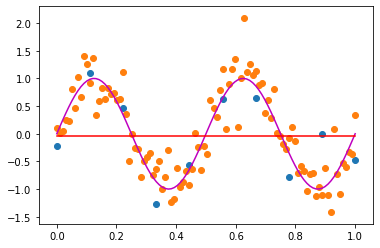

4.540287326425031
74.73578658404054
4.492594825932651


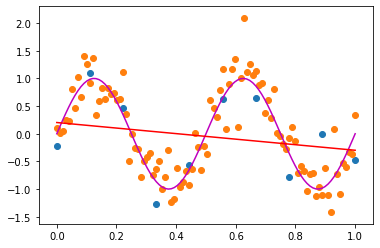

2.2759161613628742
37.297466235977325
4.492594825932651


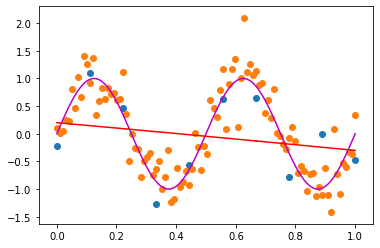

1.317852407405573
22.070430468158925
4.492594825932651


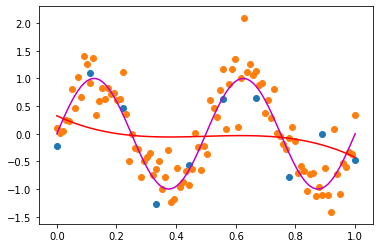

0.9187886161413235
19.969456050756197
4.492594825932651


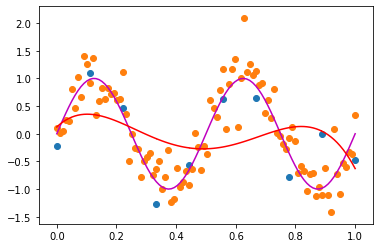

0.24328461959123926
3.4042966307034024
4.492594825932651


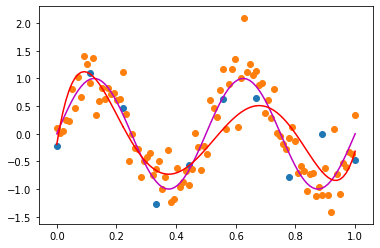

0.06802707377455333
4.32873131126015
4.492594825932651


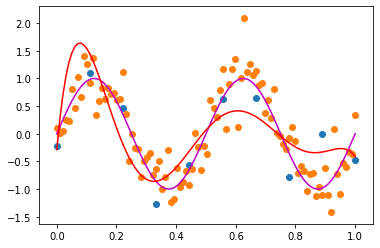

9.011633432226313e-05
10.097458592623628
4.492594825932651


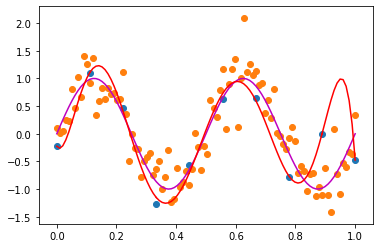

6.017216114464658e-05
7.328881321622232
4.492594825932651


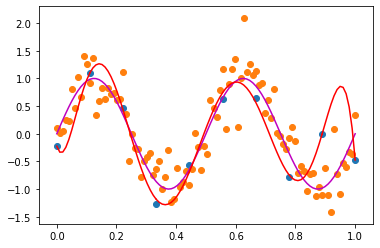

5.108689112973569e-16
40.986936286638205
4.492594825932651
0.014438700909188001
2.5006748449357747
0.5405201557467663
8.489599852021161


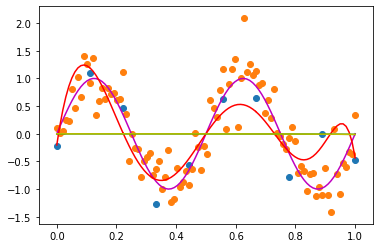

4.783470790613076
80.53245032801942
4.492594825932651


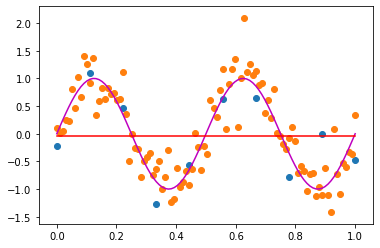

4.540287326425031
74.73578658404054
4.492594825932651


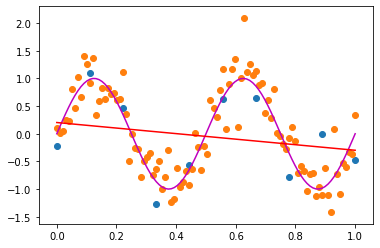

2.2759161613628742
37.297466235977325
4.492594825932651


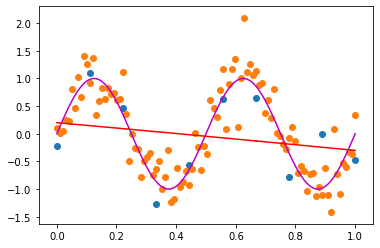

1.317852407405573
22.070430468158925
4.492594825932651


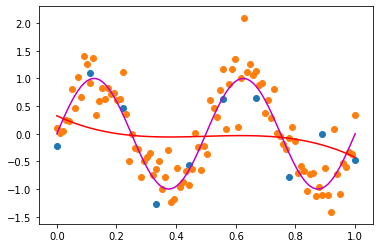

0.9187886161413235
19.969456050756197
4.492594825932651


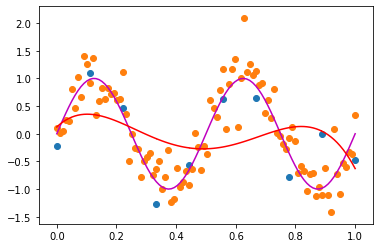

0.24328461959123926
3.4042966307034024
4.492594825932651


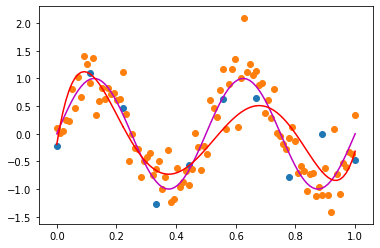

0.06802707377455333
4.32873131126015
4.492594825932651


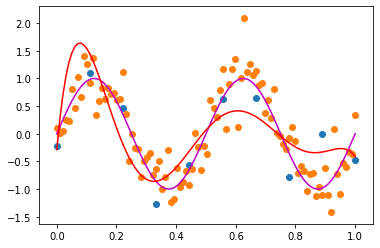

9.011633432226313e-05
10.097458592623628
4.492594825932651


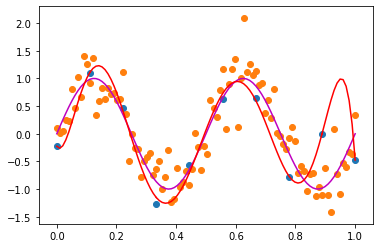

6.017216114464658e-05
7.328881321622232
4.492594825932651


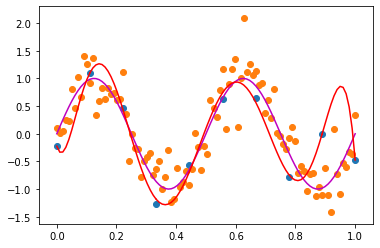

5.108689112973569e-16
40.986936286638205
4.492594825932651
0.014438700909188001
2.5006748449357747
0.5405201557467663
8.489599852021161


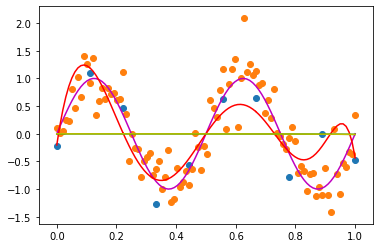

[80.53245033 74.73578658 37.29746624 22.07043047 19.96945605  3.40429663
  4.32873131 10.09745859  7.32888132 40.98693629  2.50067484  8.48959985]
1.3158667623098768


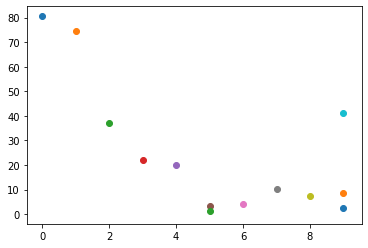

In [5]:
valid_error=find_everything(X1_train,X1_valid,9)[6]
ftrue_error=find_everything(X1_train,X1_valid,9)[7]
avg_ftrue_error = 0
print(valid_error)
plt.scatter(0,valid_error[0])
plt.scatter(1,valid_error[1])
plt.scatter(2,valid_error[2])
plt.scatter(3,valid_error[3])
plt.scatter(4,valid_error[4])
plt.scatter(5,valid_error[5])
plt.scatter(6,valid_error[6])
plt.scatter(7,valid_error[7])
plt.scatter(8,valid_error[8])
plt.scatter(9,valid_error[9])
plt.scatter(9,valid_error[10])
plt.scatter(9,valid_error[11])
for i in range(len(ftrue_error)):
    avg_ftrue_error = avg_ftrue_error + ftrue_error[i]
avg_ftrue_error = avg_ftrue_error/(i+1)
plt.scatter(5,avg_ftrue_error)
print(avg_ftrue_error)
plt.show()